## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = merge_df["Mouse ID"].nunique()
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#Reference: https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/
duplicate_df = merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# ref: Pandas - Day 1 - 06-Ins_GroupBy 
# ref: https://www.interviewqs.com/ddi-code-snippets/rows-cols-python
dupe_g989 = merge_df.loc[merge_df["Mouse ID"]=="g989", :]
dupe_g989.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.loc[merge_df["Mouse ID"] != "g989"]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].nunique()
clean_mice_df = pd.DataFrame({"Total Mice": [clean_mice]})
clean_mice_df

,Total Mice
0,248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#summary statistics
regimen_df = clean_df.groupby("Drug Regimen")
regimen_df.count()

tumor_mean = regimen_df["Tumor Volume (mm3)"].mean()
tumor_median = regimen_df["Tumor Volume (mm3)"].median()
tumor_var = regimen_df["Tumor Volume (mm3)"].var()
tumor_std = regimen_df["Tumor Volume (mm3)"].std()
tumor_SEM = regimen_df["Tumor Volume (mm3)"].sem()

#summary dataframe
summary_df = pd.DataFrame({"Mean": tumor_mean, "Median": tumor_median, "Variance": tumor_var, "Standard Deviation": tumor_std, "SEM": tumor_SEM})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

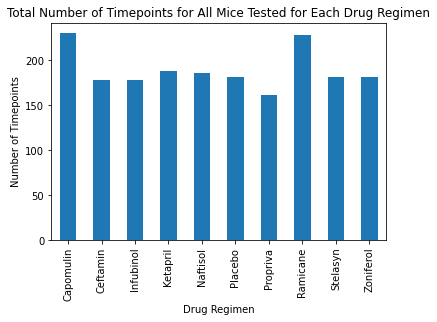

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Reference - Bike Trippin Class Examnple - Day 2 
regimen_group = merge_df.groupby("Drug Regimen")
regimen_total_timepoint = regimen_group["Timepoint"].count()


timepoint_and_regimen = regimen_total_timepoint.plot(kind="bar", title="Total Number of Timepoints for All Mice Tested for Each Drug Regimen")
timepoint_and_regimen.set_xlabel("Drug Regimen")
timepoint_and_regimen.set_ylabel("Number of Timepoints")

plt.show()
plt.tight_layout()

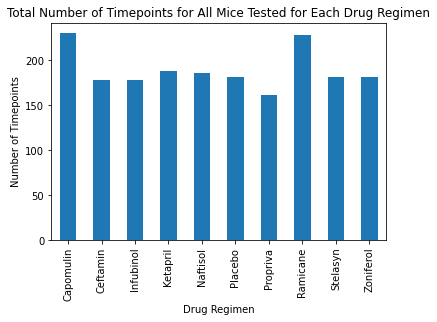

<Figure size 432x288 with 0 Axes>

In [67]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#reference: https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot
all_mice_df = merge_df.groupby("Drug Regimen")["Timepoint"].count().plot(kind="bar")

plt.title("Total Number of Timepoints for All Mice Tested for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

plt.show()
plt.tight_layout()



In [38]:
# Distribution of female versus male mice

female_vs_male_count = merge_df.groupby("Sex")["Mouse ID"].nunique()
female_vs_male_percent =  round((female_vs_male_count/249),3)

f_v_m_df = pd.DataFrame({"Gender": female_vs_male_count, "Percent": female_vs_male_percent})
f_v_m_df

,Gender,Percent
Sex,,
Female,124,0.498
Male,125,0.502


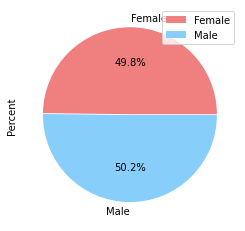

In [111]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#Reference: https://www.geeksforgeeks.org/how-to-create-pie-chart-from-pandas-dataframe/

colors = ["lightcoral", "lightskyblue"]
explode = (0.01, 0)

plot = f_v_m_df.groupby(['Sex']).sum().plot(
    kind='pie', y='Percent', autopct='%1.1f%%',
  colors=colors, explode=explode)

([<matplotlib.patches.Wedge at 0x1c7f4433490>,
 [Text(-0.7188227897037197, -0.8458095512599524, 'Females'),
  Text(0.7123469871923732, 0.8381895786980109, 'Males')],
 [Text(-0.39502874028762974, -0.46481425789961345, '49.8%'),
  Text(0.3885529021049308, 0.45719431565346047, '50.2%')])

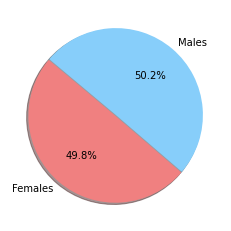

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Reference: Class 1 - 09-Inse_PieCharts

# Labels for the sections of our pie chart
labels = ["Females", "Males"]

# The values of each section of the pie chart
sizes = [0.498, 0.502]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue"]

# Tells matplotlib to separate the "females" section from the males
explode = (0.01, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [96]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = merge_df.loc[merge_df["Drug Regimen"]=="Capomulin", :]
Capomulin_df
# Ramicane_tum_vol =
# Infubinol_tum_vol =
# Ceftamin_tum_vol =

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

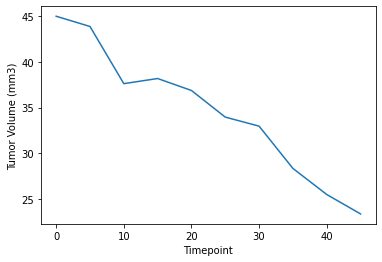

In [109]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Reference: https://www.geeksforgeeks.org/time-series-plot-or-line-plot-with-pandas/

# Summary dataframe
mouse_df = Capomulin_df.loc[Capomulin_df["Mouse ID"]=="s185", :]
mouse_df

# Line plot with labels
x_axis = mouse_df["Timepoint"]
y_axis = mouse_df["Tumor Volume (mm3)"]
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_axis, y_axis)
plt.show()



In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
